# 디렉토리 만들기

mkdir -p ~/aiffel/rock_scissor_paper/scissor
mkdir -p ~/aiffel/rock_scissor_paper/rock
mkdir -p ~/aiffel/rock_scissor_paper/paper

ls -l ~/aiffel/rock_scissor_paper

In [ ]:
# 클라우드에 가위,바위,보 라는 하위 폴더를 -p를 사용하여 생성

unzip rock.zip
unzip scissor.zip
unzip paper.zip

In [ ]:
# 각각의 하위 폴더에 사진이 들어가 있는 알집 파일을 업로드 후 압축풀기

In [3]:
from PIL import Image
import os, glob

print("PIL 라이브러리 import완료!")

PIL 라이브러리 import완료!


# 사진 사이즈 변경

In [4]:
import os

def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")  
    
	print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
	target_size=(28,28)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
		new_img.save(img, "JPEG")
    
	print(len(images), " images resized.")
	
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/scissor"
resize_images(image_dir_path)

print("가위 이미지 resize 완료!")

2320  images to be resized.
2320  images resized.
가위 이미지 resize 완료!


In [5]:
import os

def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")  
    
	print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
	target_size=(28,28)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
		new_img.save(img, "JPEG")
    
	print(len(images), " images resized.")
	
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/rock"
resize_images(image_dir_path)

print("바위 이미지 resize 완료!")

2202  images to be resized.
2202  images resized.
바위 이미지 resize 완료!


In [6]:
import os

def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")  
    
	print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
	target_size=(28,28)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
		new_img.save(img, "JPEG")
    
	print(len(images), " images resized.")
	
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/paper"
resize_images(image_dir_path)

print("보 이미지 resize 완료!")

2270  images to be resized.
2270  images resized.
보 이미지 resize 완료!


# 라벨링

In [7]:
import numpy as np

def load_data(img_path, number_of_data=6792):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/"
(x_train, y_train)=load_data(image_dir_path)
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

학습데이터(x_train)의 이미지 개수는 6792 입니다.
x_train shape: (6792, 28, 28, 3)
y_train shape: (6792,)


In [8]:
# 가위, 바위, 보는 3개의 클래스로 이루어져 있고 순서대로 0,1,2
# 세가지의 이미지 총 합을 입력 (6792장, 28x28 사이즈의 컬러 3의 값)
# 정규화 MAX-MIN = 255이기 때문에 255.0을 나눠서 0~1의 값을 갖게 한다.

# 이미지 확인

라벨:  0


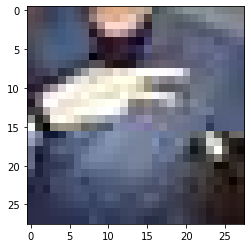

In [9]:
import matplotlib.pyplot as plt
plt.imshow(x_train[50])
print('라벨: ', y_train[20])

# 딥러닝 네트워크 설계

In [10]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

n_channel_1=32
n_channel_2=64
n_dense=64
n_train_epoch=8

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                102464    
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 1

# 학습 시키기

In [11]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train, y_train, epochs=10)

Epoch 1/10
213/213 [==============================] - 6s 11ms/step - loss: 4.0068 - accuracy: 0.4530
Epoch 2/10
213/213 [==============================] - 1s 3ms/step - loss: 0.5658 - accuracy: 0.7703
Epoch 3/10
213/213 [==============================] - 1s 3ms/step - loss: 0.3295 - accuracy: 0.8709
Epoch 4/10
213/213 [==============================] - 1s 3ms/step - loss: 0.2258 - accuracy: 0.9151
Epoch 5/10
213/213 [==============================] - 1s 3ms/step - loss: 0.1257 - accuracy: 0.9608
Epoch 6/10
213/213 [==============================] - 1s 3ms/step - loss: 0.0908 - accuracy: 0.9704
Epoch 7/10
213/213 [==============================] - 1s 4ms/step - loss: 0.1228 - accuracy: 0.9608
Epoch 8/10
213/213 [==============================] - 1s 3ms/step - loss: 0.0642 - accuracy: 0.9796
Epoch 9/10
213/213 [==============================] - 1s 3ms/step - loss: 0.0594 - accuracy: 0.9870
Epoch 10/10
213/213 [==============================] - 1s 3ms/step - loss: 0.0529 - accuracy: 0.978

In [12]:
# complie을 통해 모델을 준비
# fit을 통해 학습 진행

# 테스트

mkdir -p ~/aiffel/rock_scissor_paper/test
#test폴더 생성 -> 3개의 하위 폴더 생성 -> 각각의 폴더에  테스트 파일 업로드 -> 알집 풀기

In [14]:
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test"
(x_test1, y_test1)=load_data(image_dir_path, 300)
x_test1_norm = x_test1/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_test1.shape))
print("y_train shape: {}".format(y_test1.shape))

학습데이터(x_train)의 이미지 개수는 300 입니다.
x_train shape: (300, 28, 28, 3)
y_train shape: (300,)


In [15]:
# 300장의 테스트 이미지 준비

# 학습

In [16]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_test1, y_test1, epochs=5)

Epoch 1/5
10/10 [==============================] - 3s 238ms/step - loss: 0.2387 - accuracy: 0.8987
Epoch 2/5
10/10 [==============================] - 0s 3ms/step - loss: 0.0621 - accuracy: 0.9851
Epoch 3/5
10/10 [==============================] - 0s 3ms/step - loss: 0.0189 - accuracy: 1.0000
Epoch 4/5
10/10 [==============================] - 0s 3ms/step - loss: 0.0064 - accuracy: 1.0000
Epoch 5/5
10/10 [==============================] - 0s 3ms/step - loss: 0.0032 - accuracy: 1.0000


In [17]:
# compile로 모델 준비
# fit을 통해 학습 epochs -> 5번

# 고찰

지금은 깊게 하나하나 이해를 할 수는 없었지만, 간단한 이미지 딥러닝의 프로세스 흐름을 알게 되었다.
학습할 수 있는 이미지와 테스트를 해야하는 파일을 정확히 구분하고 나눌 수 있어야하며, 조금씩 값을 변경하면서 수치가 변하는 것을 확인할 때마다 작지만 성취감을 느낄 수 있게 해주었다.

loss값은 왜 저렇게 나오고, 정확도는 왜 저렇게 높게 나오는지에 대한 의문은 아직 풀고 있고, 좀 더 연구를 해봐야할 것 같다.
가장 흥미로웠던 부분은 Maxpooling과 channel, Dense, Epoch 와 같은 가장 중요했던 부분이다.
이미지를 특징적으로 내적하여 새로 만들어내고, 몇 개의 특징을 잡아낼 것이며, 일정 시도 이상에서 역치가 발생하는 등의 문제들은 계속해서 공부를 해보고 정리가 필요하다.